# **Data Visualization Lab**


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2023-01-09 06:56:06--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.13’

m4_survey_data.sqli 100%[===================>]  34.98M  28.5MB/s    in 1.2s    

2023-01-09 06:56:09 (28.5 MB/s) - ‘m4_survey_data.sqlite.13’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to describe a table


In [6]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [7]:
# your code goes here
QUERY = """
SELECT * FROM master
"""
df = pd.read_sql_query(QUERY,conn)

df.columns

Index(['index', 'Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer',
       'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel',
       'UndergradMajor', 'OrgSize', 'YearsCode', 'Age1stCode', 'YearsCodePro',
       'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek',
       'LastHireDate', 'FizzBuzz', 'ResumeUpdate', 'CurrencySymbol',
       'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs',
       'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests',
       'PurchaseHow', 'PurchaseWhat', 'OpSys', 'BlockchainOrg', 'BlockchainIs',
       'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion',
       'ScreenName', 'SOVisit1st', 'SOVisitFreq', 'SOFindAnswer',
       'SOTimeSaved', 'SOHowMuchTime', 'SOAccount', 'SOPartFreq', 'SOJobs',
       'EntTeams', 'SOComm', 'WelcomeChange', 'Age', 'Trans', 'Dependents',
       'SurveyLength', 'SurveyEase'],
      dtype='object')

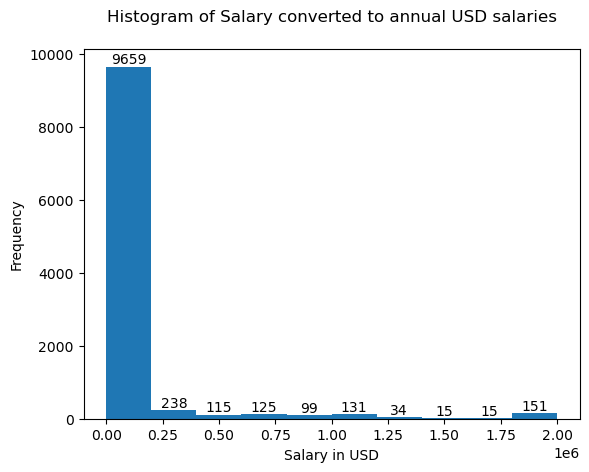

In [8]:
# your code goes here
QUERY = """
SELECT ConvertedComp FROM master
"""
df = pd.read_sql_query(QUERY,conn)

counts, edges, bars = plt.hist(df.ConvertedComp, bins = 10)

plt.bar_label(bars)
plt.title('Histogram of Salary converted to annual USD salaries', pad=20) 
plt.xlabel('Salary in USD') 
plt.ylabel('Frequency')

plt.show()

In [9]:
df.ConvertedComp.max()

2000000.0

wow, we can see for most respondent annual salaries is between 0-25k :)

### Box Plots


Plot a box plot of `Age.`


<AxesSubplot:xlabel='Age'>

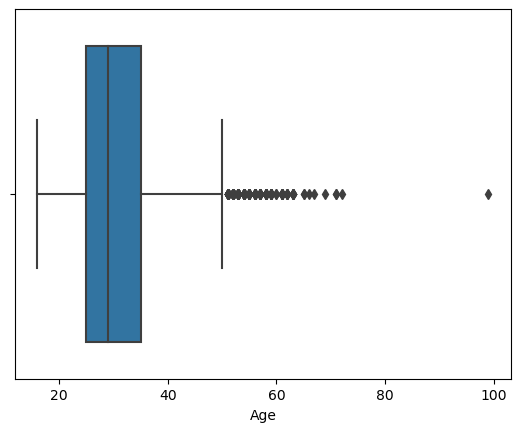

In [10]:
# your code goes here
QUERY = """
SELECT Age FROM master
"""
df = pd.read_sql_query(QUERY,conn)


sns.boxplot(df.Age)

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


Text(0, 0.5, 'Work Hours for a week')

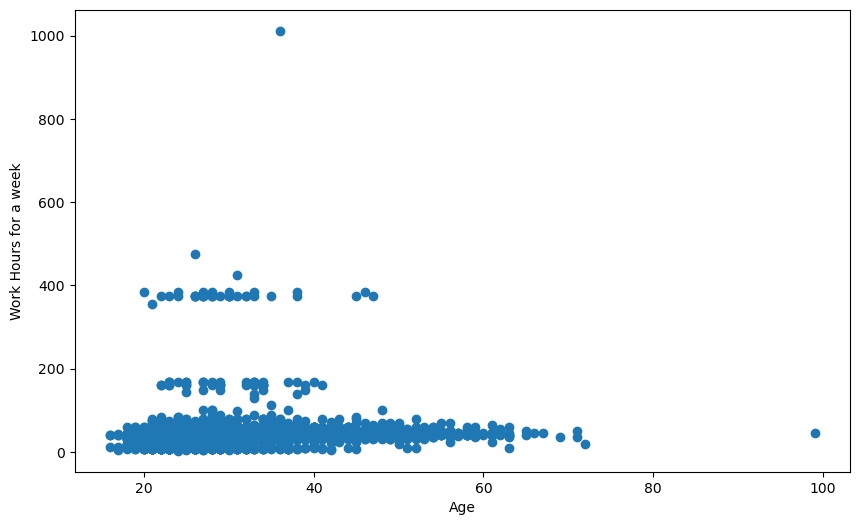

In [11]:
# your code goes here

QUERY = """
SELECT Age,WorkWeekHrs FROM master
"""
df = pd.read_sql_query(QUERY,conn)

plt.figure(figsize=(10,6))
plt.scatter(x= df.Age, y= df.WorkWeekHrs)
plt.xlabel('Age') 
plt.ylabel('Work Hours for a week') 


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


In [ ]:
# your code goes here
# using matplotlib

QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age FROM master
"""
df=pd.read_sql_query(QUERY,conn)

plt.figure(figsize=(20,6))

plt.scatter(data=df, x='WorkWeekHrs', y='CodeRevHrs', s= df.Age * 10, alpha=0.5)

plt.xlabel('WorkWeekHrs') 
plt.ylabel('CodeRevHrs')
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [ ]:
QUERY = """ 
SELECT DatabaseDesireNextYear AS Database, count(*) AS Count FROM DatabaseDesireNextYear 
GROUP BY DatabaseDesireNextYear
ORDER BY count(*) DESC
LIMIT 5

""" 

df2=pd.read_sql_query(QUERY,conn)  
df2

In [ ]:
# your code goes here
# so much easier using plotly :p
import plotly.express as px
fig = px.pie(df2, values='Count', names='Database', title='Top 5 Databases Respondents Wish To Learn')
fig.show()

Apparently GitHub notebook cannot render plotly piechart so here is a screenshot instead

In [ ]:
from IPython.display import Image
Image(filename='top5databse.png') 

# Language Trend

In [ ]:
# quiz questions

QUERY = """ 
SELECT LanguageDesireNextYear AS Language, count(*) as Count from LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
ORDER BY count(*) DESC
LIMIT 5
"""
plt.figure(figsize=(10,3))

df2=pd.read_sql_query(QUERY,conn).sort_values('Count')

plt.barh(df2.Language, df2.Count, color = 'lightskyblue')
for index, value in enumerate(df2.Count):
    plt.text(value, index,
             str(value))
    
plt.xlabel("Respondent Count")
plt.ylabel("Languages")
plt.title("Top 5 Languages Developers Desire to Use Next Year")
plt.show()

In [ ]:
# quiz questions
# language currently worked with
QUERY = """ 
SELECT LanguageWorkedWith AS Language, count(*) AS Count FROM LanguageWorkedWith
GROUP BY LanguageWorkedWith
ORDER BY count(*) DESC
LIMIT 5
"""
plt.figure(figsize=(10,3))

df2=pd.read_sql_query(QUERY,conn).sort_values('Count')

plt.barh(df2.Language, df2.Count, color = 'lightcoral')
for index, value in enumerate(df2.Count):
    plt.text(value, index,
             str(value))
    
plt.xlabel("Respondent Count")
plt.ylabel("Languages")
plt.title("Top 5 Languages Developers Used for Work in 2019")
plt.show()

## Databases trend

In [ ]:
QUERY = """ 
SELECT DatabaseDesireNextYear AS Database, count(*) AS Count FROM DatabaseDesireNextYear 
GROUP BY DatabaseDesireNextYear
ORDER BY count(*) DESC
LIMIT 5
""" 
plt.figure(figsize=(10,3))

df2=pd.read_sql_query(QUERY,conn).sort_values('Count')

plt.barh(df2.Database, df2.Count, color = 'lightskyblue')
for index, value in enumerate(df2.Count):
    plt.text(value, index,
             str(value))
    
plt.xlabel("Respondent Count")
plt.ylabel("Database")
plt.title("Top 5 Databases Developers Desire to Use Next Year")
plt.show()

In [ ]:
QUERY = """ 
SELECT DatabaseWorkedWith AS Database, count(*) AS Count FROM DatabaseWorkedWith
GROUP BY DatabaseWorkedWith
ORDER BY count(*) DESC
LIMIT 5

""" 
plt.figure(figsize=(10,3))

df2=pd.read_sql_query(QUERY,conn).sort_values('Count')

plt.barh(df2.Database, df2.Count, color = 'lightcoral')
for index, value in enumerate(df2.Count):
    plt.text(value, index,
             str(value))
    
plt.xlabel("Respondent Count")
plt.ylabel("Database")
plt.title("Top 5 Datatabases Developers Used for Work in 2019")
plt.show()

quiz

In [ ]:
# QUIZ QUESTIONS
QUERY = """ 
SELECT Respondent,DatabaseWorkedWith AS Database, count(*) AS Count FROM DatabaseWorkedWith
GROUP BY Respondent
HAVING Count = 1 AND Database = 'MySQL'
   
""" 

df2=pd.read_sql_query(QUERY,conn)  
#df.set_index('Database', inplace=True) 

df2

474 respondent only worked with MySQL 

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [ ]:
# your code goes here

QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age FROM master
WHERE Age BETWEEN 30 AND 35
"""
df=pd.read_sql_query(QUERY,conn)
df

In [ ]:
df2 = df.groupby('Age').median()
df2

In [ ]:
df2.plot(kind='bar', figsize=(10, 6), stacked=True)

plt.xlabel('Age') 
plt.ylabel('Median Hours')
plt.title('Stacked Bar Chart of Median WorkWeekHrs and CodeRevHrs for Those Age 30 to 35')
plt.show()

median work hour is less than median revision hour for age between 30-35

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [ ]:
# your code goes here

QUERY = """
SELECT Age, ConvertedComp FROM master
WHERE Age BETWEEN 45 AND 60
"""
df=pd.read_sql_query(QUERY,conn)

df2= df.groupby('Age').median()

df2.plot(kind ='line', figsize = (10,5))
plt.title('Median Annual Salaries in USD for Respondent Age 45 to 60', pad=20) 
plt.xlabel('Age') 
plt.ylabel('Median Salary')

plt.show()



In [ ]:
# quiz question

# your code goes here

QUERY = """
SELECT Age, ConvertedComp FROM master
WHERE Age BETWEEN 25 AND 30
"""
df=pd.read_sql_query(QUERY,conn)

df2= df.groupby('Age').median()

df2.plot(kind ='line', figsize = (10,5))
plt.title('Median Annual Salaries in USD for Respondent Age 25 to 30', pad=20) 
plt.xlabel('Age') 
plt.ylabel('Median Salary')

plt.show()


### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [ ]:
# your code goes here
QUERY = """
SELECT MainBranch, count(*) as Count FROM master
GROUP BY MainBranch
"""

df = pd.read_sql_query(QUERY, conn)

df


In [ ]:
df.plot(kind = 'barh')
plt.xlabel('Number of Respondents') 
plt.ylabel('Main Branch')
plt.title('Number of Respondents by Main Branch')
plt.show()

In [ ]:
pd.pandas.set_option('display.max_columns', None)

In [ ]:
# quiz questions

QUERY = """
SELECT DevType, count(*) AS Count
FROM DevType
GROUP BY DevType
ORDER BY count(*) DESC LIMIT 1
"""
df = pd.read_sql_query(QUERY, conn)
df

Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
